# Van der Pol oscillator

The Van der Pol oscillator is a non-conservative oscillator with non-linear damping. It is one of the standard models analysed in dynamics. In this tutorial the Van der Pol oscillator is analysed using SBML.

http://en.wikipedia.org/wiki/Van_der_Pol_oscillator  
http://www.opencor.ws/user/howToGetStarted.html

## History
The Van der Pol oscillator was originally proposed by the Dutch electrical engineer and physicist Balthasar van der Pol while he was working at Philips. Van der Pol found stable oscillations, which he called relaxation-oscillations[2] and are now known as limit cycles, in electrical circuits employing vacuum tubes. When these circuits were driven near the limit cycle they become entrained, i.e. the driving signal pulls the current along with it. Van der Pol and his colleague, van der Mark, reported in the September 1927 issue of Nature that at certain drive frequencies an irregular noise was heard. This irregular noise was always heard near the natural entrainment frequencies. This was one of the first discovered instances of deterministic chaos.

The Van der Pol equation has a long history of being used in both the physical and biological sciences. For instance, in biology, Fitzhugh and Nagumo extended the equation in a planar field as a model for action potentials of neurons. 

## Equations
The Van der Pol oscillator evolves in time according to the second-order differential equation

$$\frac{d^2x}{dt^2} - µ(1-x^2)\frac{dx}{dt} + x = 0$$

with initial conditions $x=−2$ and $\frac{dx}{dt}=0$. $x$ is the position coordinate—which is a function of the time $t$, and $μ$ is a scalar parameter indicating the nonlinearity and the strength of the damping.

To create a SBML file, we need to convert the second-order equation to two first-order equations by defining the velocity $\frac{dx}{dt}$ as a new variable $y$:

$$\frac{dx}{dt}=y$$
$$\frac{dy}{dt}=\mu(1-x^2)y-x$$

The initial conditions are now $x=−2$ and $y=0$.

## Requirements
* `antimony`
* `roadrunner`
* `matplotlib`

## Notebook settings
In a first step general settings for the notebook are defined.

In [8]:
# print settings for notebook 
%matplotlib inline

import matplotlib as mpl
import matplotlib.pylab as plt
mpl.rcParams;

mpl.rcParams['figure.figsize'] = (9.0, 6.0)
mpl.rcParams['axes.labelsize'] = 'medium'
font = {'family' : 'sans-serif',
        'weight' : 'normal', # bold
        'size'   : 14}
mpl.rc('font', **font)

## SBML Model
Now the model description of the Van der Pol oscillator in a standard format for computational models, the Systems Biology Markup Language ([SBML](www.sbml.org)) is created [Hucka2003]. 
The SBML for the above system of ordinary differential equations (ODEs) is created with [Antimony](http://antimony.sourceforge.net/): A modular human-readable, human-writeable model definition language [Smith?].

We set the initial conditions $x=−2$ and $y=0$ and the damping parameter $mu=0$, i.e. no dampening.

In [4]:
# create SBML
import antimony

model_id = 'van_der_pol'
# ----------------------------
model_str = '''
model {}
  
var species x = 2; 
var species y = 0;
const mu = 0;

J1: -> x; y
J2: -> y; mu *(1-x^2)*y - x

end
'''.format(model_id)
# ----------------------------

antimony.setBareNumbersAreDimensionless(True)
antimony.loadAntimonyString(model_str)
antimony.writeSBMLFile('{}.xml'.format(model_id), model_id)
# print libantimony.getSBMLString(module_name) # show the SBML

1

## Simulation

We can now use the defined model for some simulations. We use libroad

In [5]:
import roadrunner
rr = roadrunner.RoadRunner('van_der_pol.xml')
rr.selections

ImportError: No module named roadrunner

mu = 0.0


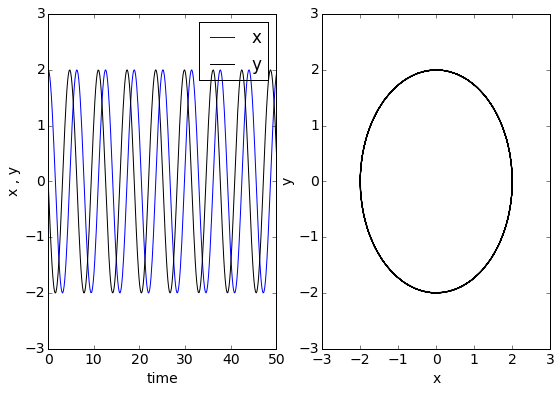

In [7]:
# Simulation 
print('mu = {}'.format(rr['mu']))
duration = 50

s = rr.simulate(start=0, duration=duration, variableStep=True, stiff=True, plot=False)
# create plot
plt.subplot(121)
plt.plot(s['time'], s['[x]'], color='blue', label='x')
plt.plot(s['time'], s['[y]'], color='black', label='y')
plt.legend()
plt.xlabel('time')
plt.ylabel('x , y');
plt.xlim([0,duration])
plt.ylim([-3,3])

plt.subplot(122)
plt.plot(s['[x]'], s['[y]'], color="black")
plt.xlabel('x')
plt.ylabel('y');
plt.xlim([-3,3])
plt.ylim([-3,3]);

## Model behavior

Evolution of the limit cycle in the phase plane. The limit cycle begins as circle and, with varying $\mu$, become increasingly sharp. An example of a [Relaxation oscillator](http://en.wikipedia.org/wiki/Relaxation_oscillator).

The Van der Pol oscillator shows an interesting behavior depending on the dampin parameter $\mu$.

![phase plane](http://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/VanderPol-lc.svg/220px-VanderPol-lc.svg.png "Van der Pol phase plane")

In [8]:
# add the additional values of interest to the selection
rr.selections

['time', '[x]', '[y]']

In [9]:
reload(roadrunner)
rr.selections = ['time'] + ['[{}]'.format(sid) for sid in rr.model.getFloatingSpeciesIds()] \
                            + rr.model.getReactionIds()
rr.selections

['time', '[x]', '[y]', 'J1', 'J2']

In [11]:
import multiscale.odesim.roadrunner.roadrunner_tools as rt
import numpy as np
results = []
mu_values = [0, 0.01, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
for mu in mu_values:
    print mu
    s, gp = rt.simulation(rr, t_start=0, t_stop=100, parameters={'mu': mu})
    results.append(s)

0
Integration time: 0.00670909881592
0.01
Integration time: 0.00849413871765
0.5
Integration time: 0.0165100097656
1.0
Integration time: 0.0204360485077
1.5
Integration time: 0.0277788639069
2.0
Integration time: 0.0275919437408
2.5
Integration time: 0.0291259288788
3.0
Integration time: 0.0303721427917
3.5
Integration time: 0.0320858955383
4.0
Integration time: 0.0274169445038


(-7, 7)

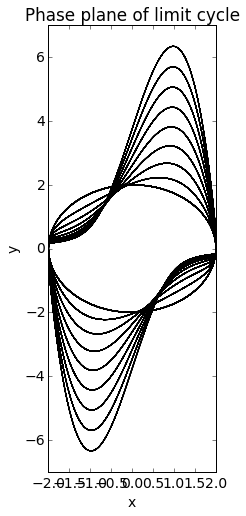

In [12]:
plt.figure(figsize=(3,8))
for k, mu in enumerate(mu_values):
    res = results[k]
    plt.plot(res['[x]'], res['[y]'], color='black')
plt.title('Phase plane of limit cycle')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-2,2])
plt.ylim([-7,7])

In [13]:
import numpy as np

In [14]:
# calculating the derivatives for given concentrations
def dxdt(rr, X, Y): 
    DX = np.zeros_like(X)
    DY = np.zeros_like(Y)
    for k, _ in np.ndenumerate(X):
        # print('X[k], Y[k]', X[k], Y[k])
        rr['[x]'], rr['[y]'] = X[k], Y[k] 
        DX[k], DY[k] = rr['J1'], rr['J2']
    return DX, DY

In [15]:
def phase_portrait(rr, x=np.linspace(-4, 4, 20), y=np.linspace(-7, 7, 20), figsize = (5,8)):
    
    fig2 = plt.figure(figsize=figsize)
    ax2 = fig2.add_subplot(1,1,1)

    # quiverplot
    # define a grid and compute direction at each point
    X1 , Y1  = np.meshgrid(x, y)                    # create a grid
    DX1, DY1 = dxdt(rr, X1, Y1)                   # compute J1 and J2 (use roadrunner as calculator)

    M = (np.hypot(DX1, DY1))                        # norm the rate 
    M[ M == 0] = 1.                                 # avoid zero division errors 
    DX1 /= M                                        # normalize each arrows
    DY1 /= M

    ax2.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
    # ax2.xaxis.label = 'x'
    # ax2.yaxis.label = 'y'
    # ax2.legend()
    ax2.grid()

0.3
Integration time: 0.0264019966125
0.0
Integration time: 0.0128951072693
0.3
Integration time: 0.015499830246
4.0
Integration time: 0.0254888534546


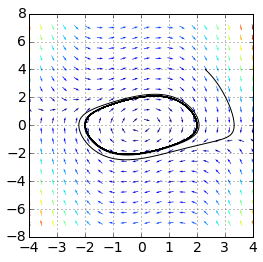

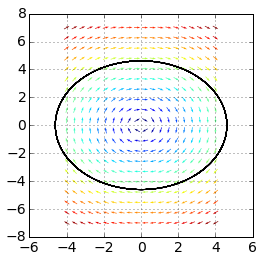

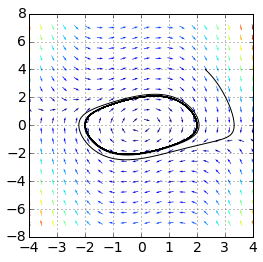

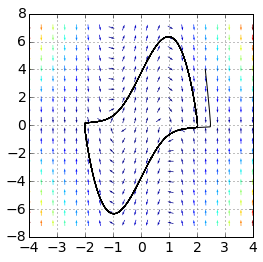

In [19]:
for mu in [0.3, 0.0, 0.3, 4.0]:
    print mu
    rr['mu'] = mu
    phase_portrait(rr, figsize=(4,4))
    trajectory(mu, x0=2.3, y0=4.0)

## Phase plane and trajectories

We can now analyse the phase plane and the trajectories for different damping values $mu$.

Integration time: 0.0191011428833
Integration time: 0.0153238773346
Integration time: 0.0154688358307
Integration time: 0.01451420784
Integration time: 0.0154819488525


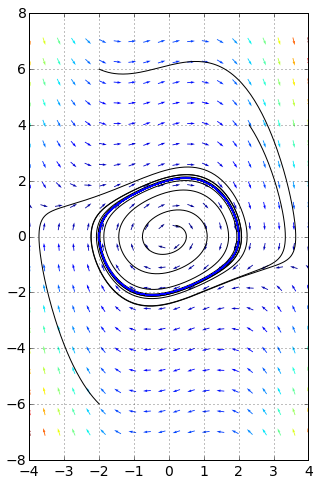

In [20]:
mu = 0.3  # 0.0, 0.3, 4.0

# create phase portrait
rr['mu'] = mu
phase_portrait(rr)
# single trajectories
def trajectory(mu, x0=2.0, y0=0.0, color="black"):
    s, _ = rt.simulation(rr, t_start=0, t_stop=100, parameters = {'mu' : mu}, init_concentrations={'x':x0, 'y':y0})
    plt.plot(s['[x]'], s['[y]'], color=color)


trajectory(mu, x0=2.3, y0=4.0)
trajectory(mu, x0=0.2, y0=0.4)
trajectory(mu, x0=-2.0, y0=6.0)
trajectory(mu, x0=-2.0, y0=-6.0)
# limit cycle
trajectory(mu, color="blue")